In [4]:
import sys
sys.path.append("..") 
from app.db_builder import create_large_db
import pandas as pd
import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as matplot_dates

In [3]:
# This block makes an SQLite database 
db = create_large_db('../app/database/large-11-17.db')
db.create_table()


SQL database built at ../app/database/large-11-17.db


In [32]:
#kaggle_data = pd.read_csv('../database/training.1600000.processed.noemoticon.csv',encoding = "cp1252")

kaggle_data.head()

NameError: name 'kaggle_data' is not defined

In [33]:
# This block demonstrates how to add entries into the database

for index, row in kaggle_data.iterrows():
    print(index,end="\r")
    
    entry = db_kaggle.create(
        sentiment = row['a'],
        username = row['e'],
        date = row['c'],
        content= row['f']
    )

NameError: name 'kaggle_data' is not defined

0.0010859966278076172
Num entries:215


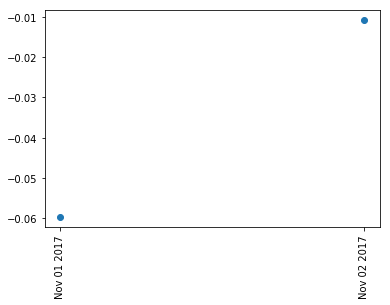

In [6]:


# This block demonstrates how to query the database
start = time.time()
query = (db
         .select()
         .where(db.text.match('Green')))
end = time.time()
print(end - start)

print('Num entries:' + str(len(query)))

# Now we're going to extract the sentiment and date information and get the average sentiment on a particular date
sentiment_array = []
date_dict = {}
count_dict = {}
fav_max = 0


for entry in query:
    sentiment_array.append(entry.sentiment)
    #if entry.urls is not None:
        #print(entry.retweet_count)
    # We need to remove the timezone, day and hour data
    temp_date = entry.created_at.split()

    temp_date.pop(0)
    temp_date.pop(2)
    temp_date.pop(2)

    # This makes it a datetime object for easier working
    #formatted_date = datetime.datetime.strptime(' '.join(temp_date), '%b %d %Y')
    formatted_date = ' '.join(temp_date)
    # We now take the average of the sentiment by keeping a running average
    if formatted_date in date_dict:
        count_dict[formatted_date] = count_dict[formatted_date] + 1
        date_dict[formatted_date] = (date_dict[formatted_date] + 
                                    (entry.sentiment-date_dict[formatted_date])/
                                     count_dict[formatted_date])
    else:
        count_dict[formatted_date] = 0
        date_dict[formatted_date] = 0

sorted_dates = sorted(count_dict)

plt.plot_date(sorted_dates,date_dict.values())   
plt.xticks(rotation='vertical')
plt.plot()

date_list = []
sentiment_list = []

for key in sorted(date_dict):
    date_list.append(key), sentiment_list.append(date_dict[key])
           
